In [1]:
library(tidyverse)
library(modelr)
options(na.action = na.warn)

# setting a random seed ensures that randomly generated numbers are the same everytime you run the notebook
# ensures reproducible results
set.seed(2021)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Let's create a model that predicts whether a Midwestern county is in a metro area based on the county's population density using logistic regression.

In [15]:
midwest

PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,⋯,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
561,ADAMS,IL,0.052,66090,1270.9615,63917,1702,98,249,⋯,19.63139,4.355859,63628,96.27478,13.151443,18.011717,11.009776,12.443812,0,AAR
562,ALEXANDER,IL,0.014,10626,759.0000,7054,3496,19,48,⋯,11.24331,2.870315,10529,99.08714,32.244278,45.826514,27.385647,25.228976,0,LHR
563,BOND,IL,0.022,14991,681.4091,14477,429,35,16,⋯,17.03382,4.488572,14235,94.95697,12.068844,14.036061,10.852090,12.697410,0,AAR
564,BOONE,IL,0.017,30806,1812.1176,29344,127,46,150,⋯,17.27895,4.197800,30337,98.47757,7.209019,11.179536,5.536013,6.217047,1,ALU
565,BROWN,IL,0.018,5836,324.2222,5264,547,14,5,⋯,14.47600,3.367680,4815,82.50514,13.520249,13.022889,11.143211,19.200000,0,AAR
566,BUREAU,IL,0.050,35688,713.7600,35157,50,65,195,⋯,18.90462,3.275891,35107,98.37200,10.399635,14.158819,8.179287,11.008586,0,AAR
567,CALHOUN,IL,0.017,5322,313.0588,5298,1,8,15,⋯,11.91739,3.209601,5241,98.47802,15.149781,13.787761,12.932331,21.085271,0,LAR
568,CARROLL,IL,0.027,16805,622.4074,16519,111,30,61,⋯,16.19712,3.055727,16455,97.91729,11.710726,17.225462,10.027037,9.525052,0,AAR
569,CASS,IL,0.024,13437,559.8750,13384,16,8,23,⋯,14.10765,3.206799,13081,97.35060,13.875086,17.994784,11.914343,13.660180,0,AAR


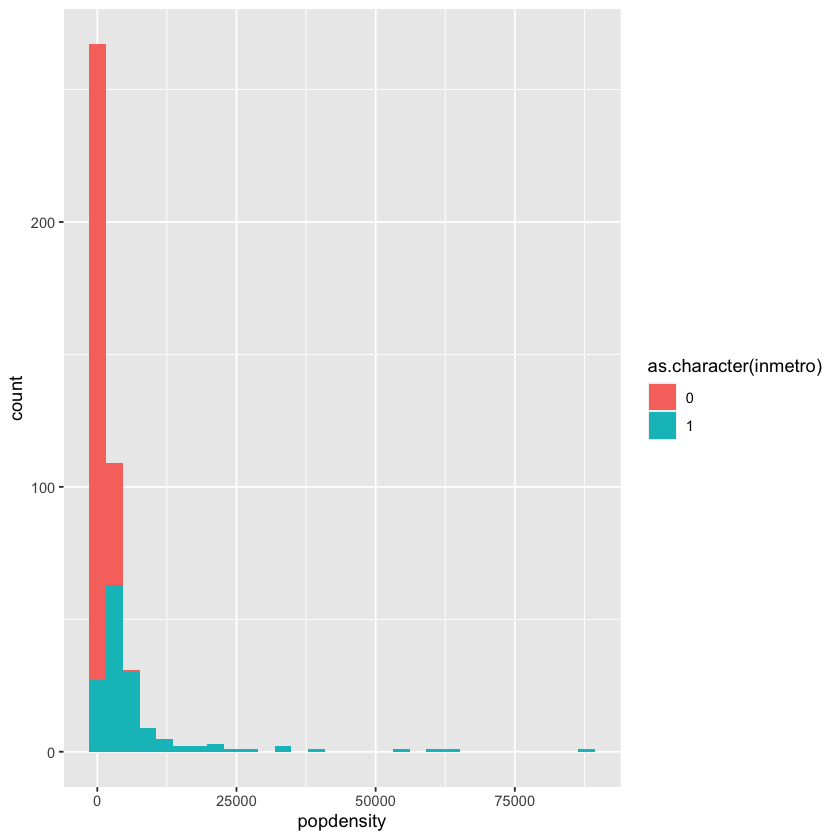

In [5]:
ggplot(midwest) +
    geom_histogram(aes(x=popdensity, fill=as.character(inmetro)), bins = 30)

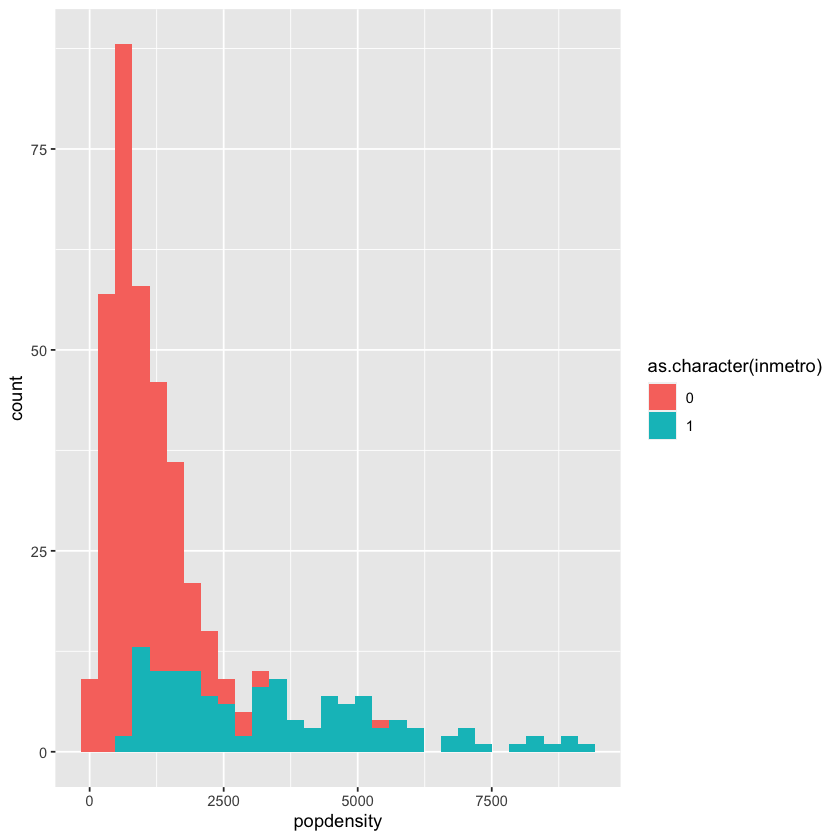

In [6]:
ggplot(filter(midwest, popdensity < 10000)) +
    geom_histogram(aes(x=popdensity, fill=as.character(inmetro)), bins = 30)

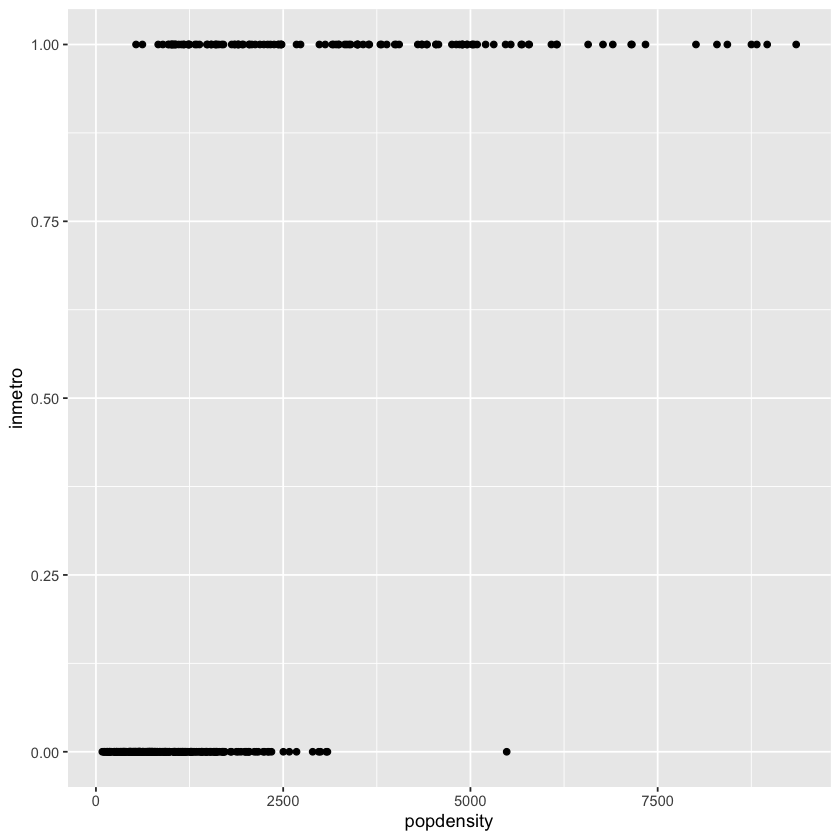

In [8]:
ggplot(filter(midwest, popdensity < 10000)) + geom_point(aes(popdensity, inmetro))

Let's plot a single logistic model on the data.

In [11]:
# define a logistic model
a1 = -5
a2 = 1/1000

logistic_curve <- function(x) {(1) / (1+exp(-(a1+a2*x)))}

logistic_curve(1000)

[1] 0.01798621

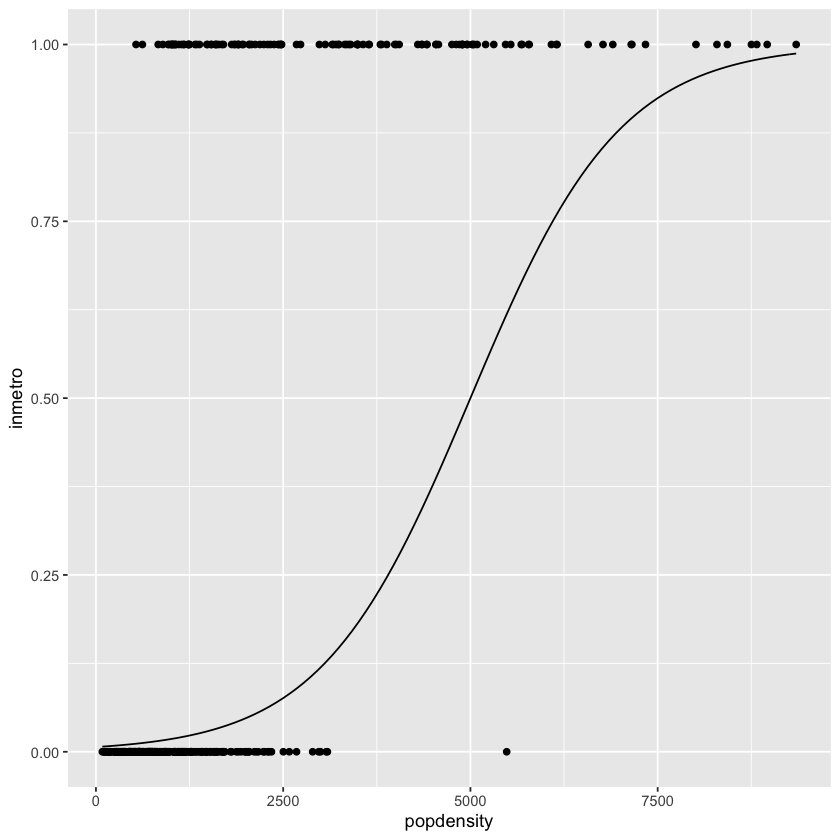

In [12]:
# plot a logistic model
ggplot(filter(midwest, popdensity < 10000)) +
    geom_point(aes(popdensity, inmetro)) +
    geom_function(fun = logistic_curve)

In [16]:
# Let's used the filtered dataset (the outliers cause some numerical errors in our implementation)

# we can use PID as our row id
train <- filter(midwest, popdensity < 10000) %>%
    sample_frac(.60)

valid_test <- anti_join(filter(midwest, popdensity < 10000), train, by = "PID")

valid <- valid_test %>%
    sample_frac(.50)

test <- anti_join(valid_test, valid, by = "PID")

Let's write a Binary Cross-Entropy Loss function. For reference here is the RMSE loss function from last week.

In [25]:
RMSE <- function(a, data) {
    preds <- a[1] + data$x * a[2]
    diffs <- data$y - preds
    sqrt(mean(diffs^2))
}

And here's the formula for BCE Loss:

![](https://github.com/mgruddy/Intro_Data_ScienceR_Spring2021/blob/main/Slides/Screenshots/BCELoss.png?raw=true)

In [18]:
# computes the outputs at an x value for a particular choice of parameters
logistic_model <- function(a, data) {(1) / (1+exp(-(a[1]+a[2]*data$x1 + a[3]*data$x2 + a[4]*data$x3)))}

# make sure it works for vectorized data
#logistic_model(c(0,1), c(0,1,2,3,4))

[1] 0.5000000 0.7310586 0.8807971 0.9525741 0.9820138

In [19]:
BCE <- function(a, data) {
    preds <- logistic_model(a, data)
    truth <- data$y
    value <- truth * log(preds) + (1 - truth) * log(1 - preds)
    mean(-value)
}

(best <- optim(c(0,0,0,0), BCE, data = mutate(train, x1 = popdensity, x2 = other_variable, x3=z, y = inmetro)))

$par
[1] -3.416257601  0.001530893

$value
[1] 0.3713101

$counts
function gradient 
     103       NA 

$convergence
[1] 0

$message
NULL

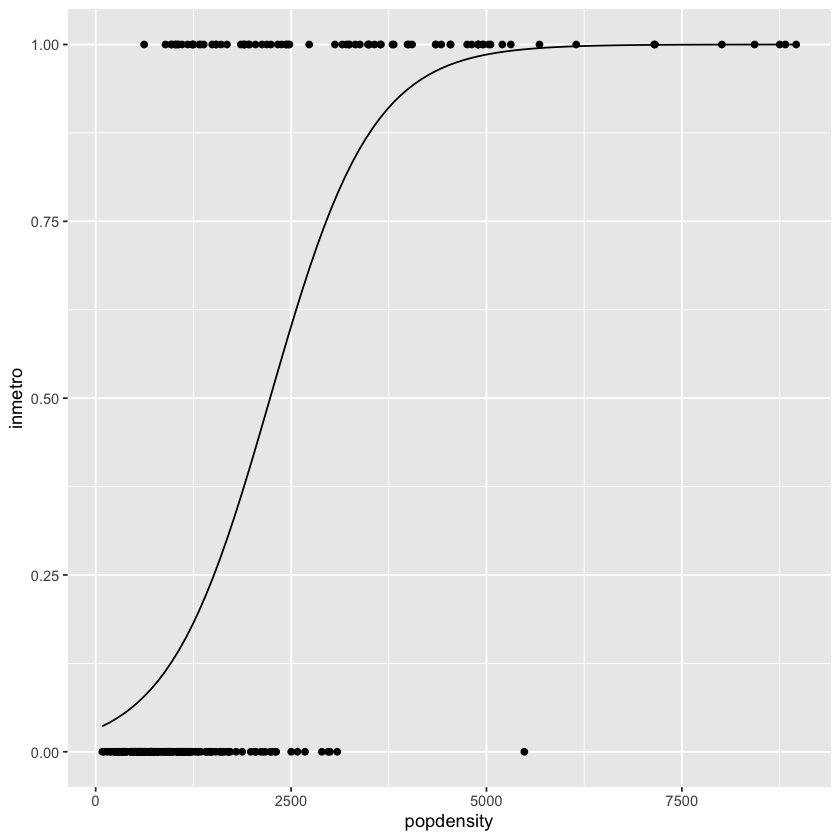

In [20]:
a1 = best$par[1]
a2 = best$par[2]

logistic_curve <- function(x) {(1) / (1+exp(-(a1+a2*x)))}

ggplot(train) +
    geom_point(aes(popdensity, inmetro)) +
    geom_function(fun = logistic_curve)

[1] 0.2728912

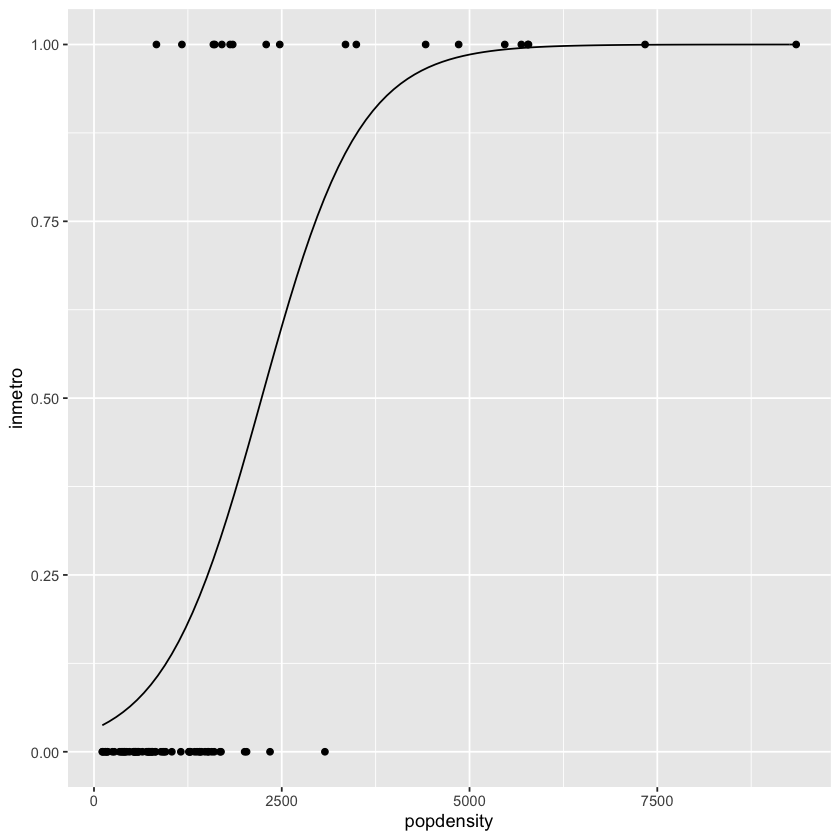

In [21]:
BCE(best$par, mutate(valid, x = popdensity, y = inmetro))

ggplot(valid) +
    geom_point(aes(popdensity, inmetro)) +
    geom_function(fun = logistic_curve)

Let's compute a **metric** for our model: Accuracy.
- There are other metrics for binary classification such as Precision and Recall

In [22]:
avg_accuracy <- function(a, data, threshold=.5) {
    preds <- logistic_model(a, data$x)   # get predictions for our data
    preds <-  preds > .5   # turn our probabilities into predictions, using our threshold
    
    # remember that in a Boolean vector, T is 1 and F is 0!
    truth <- data$y
    wrong <- abs(preds - truth)
    pct_wrong <- sum(wrong) / length(wrong)
    1 - pct_wrong
}

In [23]:
avg_accuracy(best$par, mutate(train, x = popdensity, y = inmetro))
avg_accuracy(best$par, mutate(valid, x = popdensity, y = inmetro))

[1] 0.8306452

[1] 0.8915663

For fun we can compare the accuracy of a linear model using RMSE.

In [26]:
(best_linear <- optim(c(0, 0), RMSE, data = mutate(train, x = popdensity, y = inmetro)))

$par
[1] 0.0113407780 0.0001763867

$value
[1] 0.3592815

$counts
function gradient 
      73       NA 

$convergence
[1] 0

$message
NULL

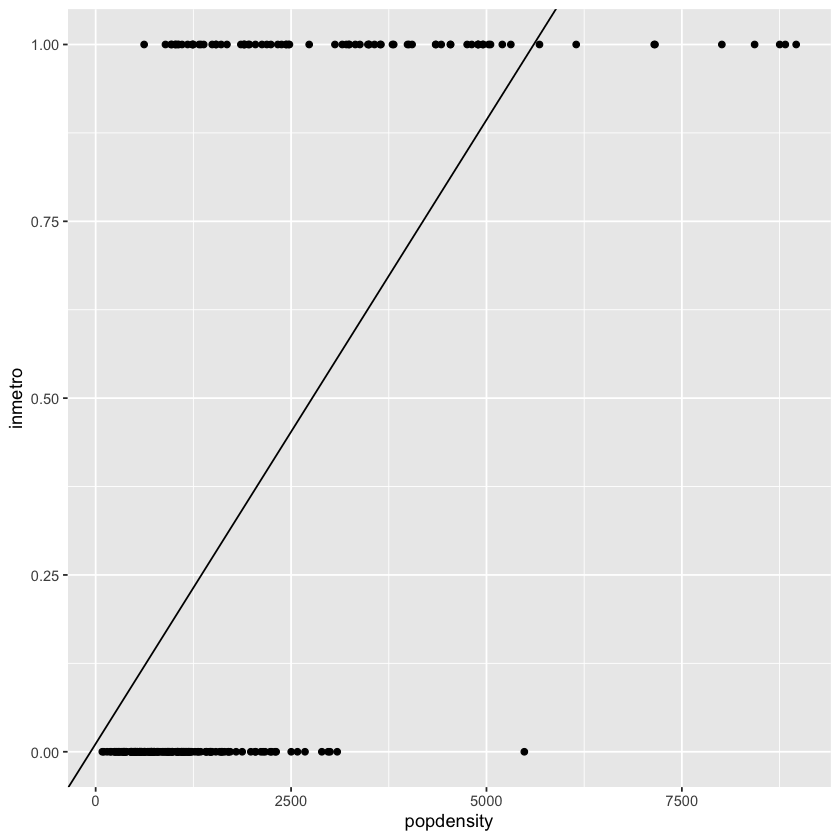

In [27]:
ggplot(train) +
    geom_point(aes(popdensity, inmetro)) +
    geom_abline(aes(intercept = best_linear$par[1], slope = best_linear$par[2]))

In [29]:
avg_accuracy_linear <- function(a, data, threshold=.5) {
    preds <- a[1] + a[2] * data$x   # get predictions for our data
    preds <-  preds > .5   # turn our probabilities into predictions, using our threshold
    
    # remember that in a Boolean vector, T is 1 and F is 0!
    truth <- data$y
    wrong <- abs(preds - truth)
    pct_wrong <- sum(wrong) / length(wrong)
    1 - pct_wrong
}

In [30]:
avg_accuracy_linear(best_linear$par, mutate(train, x = popdensity, y = inmetro))
avg_accuracy_linear(best_linear$par, mutate(valid, x = popdensity, y = inmetro))

[1] 0.8266129

[1] 0.8795181

## Using ```lm```and ```glm```

In [31]:
sim1

x,y
<int>,<dbl>
1,4.199913
1,7.510634
1,2.125473
2,8.988857
2,10.243105
2,11.296823
3,7.356365
3,10.505349
3,10.511601


In [32]:
?lm

In [33]:
lm(y ~ x, sim1)


Call:
lm(formula = y ~ x, data = sim1)

Coefficients:
(Intercept)            x  
      4.221        2.052  


In [35]:
lm(inmetro ~ popdensity, train)


Call:
lm(formula = inmetro ~ popdensity, data = train)

Coefficients:
(Intercept)   popdensity  
  0.0112801    0.0001764  


In [36]:
glm(data = train, inmetro ~ popdensity, family = binomial())


Call:  glm(formula = inmetro ~ popdensity, family = binomial(), data = train)

Coefficients:
(Intercept)   popdensity  
  -3.415897     0.001531  

Degrees of Freedom: 247 Total (i.e. Null);  246 Residual
Null Deviance:	    313.3 
Residual Deviance: 184.2 	AIC: 188.2

In [38]:
glm(data = train, inmetro ~ area + poptotal + popdensity, family = binomial())


Call:  glm(formula = inmetro ~ area + poptotal + popdensity, family = binomial(), 
    data = train)

Coefficients:
(Intercept)         area     poptotal   popdensity  
  3.570e-01   -1.455e+02    7.806e-05   -4.855e-04  

Degrees of Freedom: 247 Total (i.e. Null);  244 Residual
Null Deviance:	    313.3 
Residual Deviance: 169.8 	AIC: 177.8

In [42]:
# model is price = a1 + a2*x + a3*y + a4*z + a5*carat + a6*depth + a7*table
lm(data = diamonds, price ~ x + y + z + carat + depth + table)


Call:
lm(formula = price ~ x + y + z + carat + depth + table, data = diamonds)

Coefficients:
(Intercept)            x            y            z        carat        depth  
   20849.32     -1315.67        66.32        41.63     10686.31      -203.15  
      table  
    -102.45  


In [ ]:
# best model price = 20849.32 - 1315.67x + 66.32y ....